# Crop Recommendations

* Attributes Description

Variable | Description
----------|-------------
N | Ratio of Nitrogen content in soil
P | Ratio of Phosphorous content in soil
K | Ratio of Potassium content in soil
temperature | Temperature in degree Celsius
humidity | Relative humidity in %
ph | Ph value of the soil
rainfall | Rainfall in mm

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Statistical info
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
# Datatypes of Attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# Check the unique values in dataset
df.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

### Preprocessing the Dataset

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df['label'].value_counts()

papaya         100
mothbeans      100
mungbean       100
coconut        100
rice           100
muskmelon      100
pomegranate    100
blackgram      100
maize          100
watermelon     100
jute           100
mango          100
kidneybeans    100
cotton         100
pigeonpeas     100
apple          100
grapes         100
coffee         100
orange         100
lentil         100
chickpea       100
banana         100
Name: label, dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='N', ylabel='Density'>

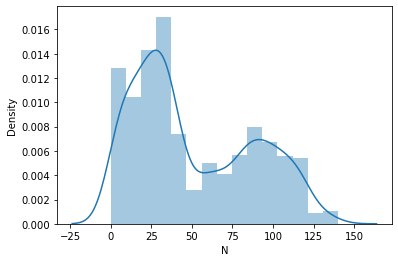

In [9]:
sns.distplot(df['N'])

<AxesSubplot:xlabel='P', ylabel='Density'>

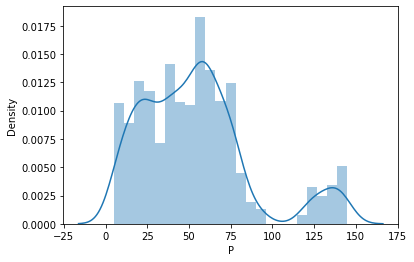

In [10]:
sns.distplot(df['P'])

<AxesSubplot:xlabel='K', ylabel='Density'>

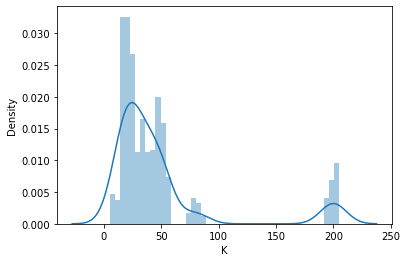

In [11]:
sns.distplot(df['K'])

<AxesSubplot:xlabel='temperature', ylabel='Density'>

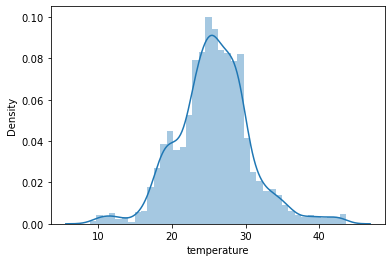

In [12]:
sns.distplot(df['temperature'])

<AxesSubplot:xlabel='humidity', ylabel='Density'>

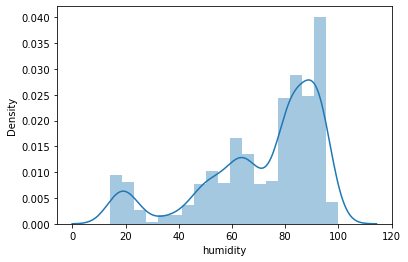

In [13]:
sns.distplot(df['humidity'])

<AxesSubplot:xlabel='ph', ylabel='Density'>

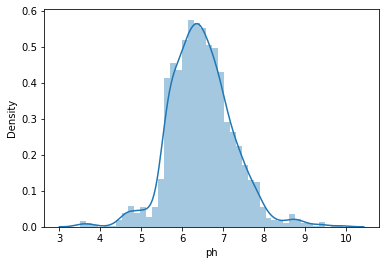

In [14]:
sns.distplot(df['ph'])

<AxesSubplot:xlabel='rainfall', ylabel='Density'>

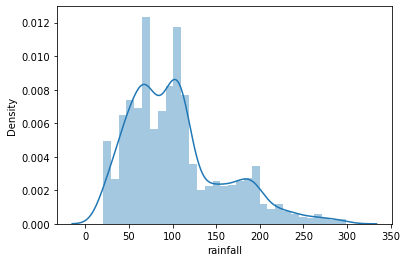

In [15]:
sns.distplot(df['rainfall'])

### Correlation Matrix

<AxesSubplot:>

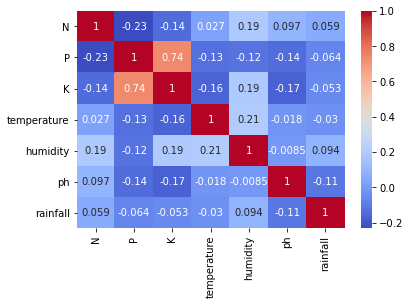

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Input split

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the  Model on the Training set based

## Logistic Regresion

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Logistic Regression's Accuracy :", acc)

Logistic Regression's Accuracy : 0.9636363636363636


In [21]:
# Cross validation score (NaiveBayes)
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [22]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.87      0.91      0.89        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.82      0.82      0.82        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.95      0.84      0.89        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        23
      papaya       0.95    

## Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Support Vector Machine's Accuracy :", acc)

Support Vector Machine's Accuracy : 0.9863636363636363


In [24]:
# Cross validation score (NaiveBayes)
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.98181818, 0.98863636, 0.98863636, 0.98181818, 0.98409091])

In [25]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.91      0.95      0.93        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.94      0.94      0.94        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.96      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

## K-Nearest Neighbours

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbours's Accuracy :", acc)

K-Nearest Neighbours's Accuracy : 0.9772727272727273


In [27]:
# Cross validation score (NaiveBayes)
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

In [28]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.91      0.95      0.93        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.89      0.94      0.91        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.92      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      0.96      0.98        23
      papaya       1.00    

## Kernel SVM

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Kernel SVM's Accuracy :", acc)

Kernel SVM's Accuracy : 0.9772727272727273


In [30]:
# Cross validation score (NaiveBayes)
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.98409091, 0.97954545, 0.97954545, 0.97272727, 0.975     ])

In [31]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.95      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.81      1.00      0.89        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.89      0.94      0.91        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.96      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Naive Bayes's Accuracy :", acc)

Naive Bayes's Accuracy : 0.9931818181818182


In [33]:
# Cross validation score (NaiveBayes)
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [34]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

## Decision Tree Classification

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Decision Tree Classification's Accuracy :", acc)

Decision Tree Classification's Accuracy : 0.990909090909091


In [36]:
# Cross validation score (NaiveBayes)
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.98863636, 0.96818182, 0.99318182, 0.98636364, 0.97727273])

In [37]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.95      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.88      0.94        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       1.00      1.00      1.00        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       0.86      1.00      0.92        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.96      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

## Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Random Forest Classification's Accuracy :", acc)

Random Forest Classification's Accuracy : 0.9954545454545455


In [39]:
# Cross validation score (NaiveBayes)
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.99545455, 0.99090909, 0.99545455, 0.99318182, 0.98863636])

In [40]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

### Predicting a new result

In [41]:
print(classifier.predict(sc.transform([[90,42,43,20.82312,82.00284,6.50232,202.93536]])))

['rice']
